# LIN 353C: Introduction to Computational Linguistics,  Fall 2022, Erk

# Homework 5:  Logistic regression, and word similarities

## Due: Wednesday October 19, 3pm right before class

## Your name: Eloragh Espie
## Your EID: eae2273

This homework comes with the following files:

* Introcl_homework_5.ipynb: this notebook, which has the homework problems. **Please put your answers into this same notebook.**
* `trainreviews.txt`, `trainlabels.txt`, `testreviews.txt`, `testlabels.txt`: Data to be used for the sentiment analysis classifier


Please record all your answers in the appropriate place in this notebook, and **do not forget to put your name and EID at the top of this notebook**.

For the part of the homework that requires you to write Python code,
we need to see the code.
You can omit statements that
produced an error or that did not form part of the eventual solution,
but please include all the Python code that formed part of your
solution. 

Please use comments to explain what your code does. Any code that seems complicated to you, or goes on for more than 2 lines, can probably use a comment. Just practice commenting more than you think the code needs. As you will see once you pull out an old piece of code you wrote and try to figure out what you were doing, code always needs more comments than you think.

### Important note: Please hit the fast-forward button on this notebook, and confirm "Restart and Run all cells", so the code included in this notebook will be executed on your machine. However, there is one command below (loading a gensim space) that may take a while, please plan for that. 


**If any of these instructions do not make sense to you, please get in
 touch with the instructor right away.**


A perfect solution to this homework will be worth *100* points. 



# Problem 1: Sentiment Analysis with Logistic Regression 

In this problem, you will do classification, again for sentiment analysis: You will train a classifier to tell apart positive and negative  reviews. But this time, you will not use Naive Bayes but Logistic Regression.

## Training and test data

The data we use is from http://www.cs.jhu.edu/~mdredze/datasets/sentiment/index2.html. They have reviews in four different areas; we only use the DVD movie reviews. We have split the reviews into a training set and a test set; the files are included with this homework. 

Here is how to read in the reviews, and their gold labels. We have used 1 for positive reviews, and 0 for negative reviews:

In [1]:
# training data
trainingdocs = open("trainreviews.txt").readlines()
# training labels: convert to integers
traininglabels = [int(v) for v in open("trainlabels.txt").read().split()]

# test data
testdocs = open("testreviews.txt").readlines()
# test labels: convert to integer
testlabels = [int(v) for v in open("testlabels.txt").read().split()]

print("number of training datapoints: ", len(trainingdocs))
print("number of test datapoints: ", len(testdocs))

number of training datapoints:  1800
number of test datapoints:  199


## 1.1 Preprocessing (20 points)

In the Jupyter Notebook on Naive Bayes with scikit-learn, you learned how to use sklearn's feature extraction datatypes to transform text data into the vectors of numbers that sklearn takes as input. 

For this problem, use again the text transformation datatype `CountVectorizer`. Please check the notebook on Naive Bayes on how to get an object of this type. To remind you, `CountVectorizer` takes as input a list of documents and turns them into a matrix of counts.

In the Naive Bayes notebook, we used the `CountVectorizer` object with all its default values. But it can be customized. If you like, you can experiment with some settings, for example the `CountVectorizer` can also remove stopwords, or count bigrams instead of unigrams only. You can find information on this here:
* Here is the documentation page: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* Here is a tutorial: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

If you experiment with the settings, document clearly what settings you used and what they do.

Use a `CountVectorizer` object to transform both the training and the test data from above. Please store the `CountVectorizer` object in a variable called `feature_extractor`.



In [2]:
# place your code here

from sklearn.feature_extraction.text import CountVectorizer

# initialize the CountVectorizer object

feature_extractor = CountVectorizer()

# fit transform to the training docs

trans_trainingdocs = feature_extractor.fit_transform(trainingdocs)

# transform test data for later
 
trans_testdocs = feature_extractor.transform(testdocs)

## 1.2 Training and test (20 points)

For this problem, make a logistic regression object using `sklearn`, train it on the training data, and apply it to the test data. 

This works exactly like for Naive Bayes, except that you need a `LogisticRegression` object, as described here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

You will need to import it from `sklearn.linear_model`. Please store the classifier itself in a variable called `lmodel`. And store the classification results for the test data in a variable called `result`.


In [3]:
# space for your code here

from sklearn.linear_model import LogisticRegression

# initialize the LogisitcRegression object
# I upped the max iterations from 100 to 200
# because I kept getting an error that I was surpassing the max

lmodel = LogisticRegression(max_iter = 200)

# fit the model using the transformed training docs and labels

lmodel.fit(trans_trainingdocs, traininglabels)

# store the models predictions for the test docs in result

result = lmodel.predict(trans_testdocs)

You can now make a list that pairs each prediction with the true label by using the function `zip()`. This function takes two lists of equal length and "zips" them into a list of pairs, like so:

In [4]:
list1 = ["a", "b", "c"]
list2 = [100, 200, 300]
list(zip(list1, list2))

[('a', 100), ('b', 200), ('c', 300)]

You will need to use this command:

`predicted_and_gold = list(zip(result, testlabels))`

This will produce a list of pairs. The first member of each pair is the model's guess, and the second member of the pair is the true label.

When you inspect the first elements of `predicted_and_gold` with the command
`predicted_and_gold[:5]`
you should see something like this:
`[(1, 1), (1, 1), (1, 1), (1, 1), (0, 1)]`

Please compute the *accuracy* of your model as the fraction of test datapoint where it got the prediction right:
* Count the number of correct guesses: Iterate over the pairs of labels in `predicted_and_gold`. Whenever the predicted label is the same as the gold label, add one to the number of correct guesses.
* Afterwards, you can compute the accuracy as the number of correct guesses divided by the number of test labels.

In [5]:
# space for your code here

# create the zip list that matches
# the models result to the correct label

predicted_and_gold = list(zip(result, testlabels))

#get the length of the labels for later

test_length = len(testlabels)

# set a counter variable

correct_guesses = 0

# loop through the tuples in the zip list
# every time the two items in the tuple match
# add one to the counter variable

for tup in predicted_and_gold:
    if tup[0] == tup[1]:
        correct_guesses += 1

# the confidence score is the number of correct guesses
# divided by the number of labels

print(f"Confidence score: {correct_guesses/test_length:.3%}")

Confidence score: 79.899%


## 1.3 Inspecting weights (20 points)

As we discussed in class, logistic regression learns a weight for each feature. Features with a high positive weight are the features that are most typical of positive reviews. Features with a high negative weight are the features that are most typical of negative reviews. 

For this problem, you will inspect the weights to see which features the model found particularly indicative. 

We will again use the function `zip()` that we used in the previous problem. We will also make use of the fact that a logistic regression model in sklearn stores a matrix of all its feature weights in `coef_` (with the underscore). The features are in the same order as in the list of feature names in `feature_extractor`. You can make a list of all feature/weight pairs with the following command:

`words_and_weights= zip(feature_extractor.get_feature_names(), 
                       lmodel.coef_.tolist()[0])`
                       
Please inspect indicative features as follows:
* Sort the list `words_and_weights` of word/weight pairs by the weights.
* Display the 10 words with the highest positive weight.
* Display the 10 words with the lowest negative weight.

In [6]:
# space for your code here

#TODO: Ask about weights -
## Do they correlate to the positive and negative reviews?

# use zip again to create tuples of the feature names and their weights

words_and_weights = zip(feature_extractor.get_feature_names(), lmodel.coef_.tolist()[0])

# sort by weight, highest to lowest

words_and_weights_sorted = sorted(words_and_weights, key = lambda x: x[1], reverse = True)

# print the 10 features with the highest positive weight
# and the 10 features with the lowest negative weight

print(f"Highest Positive Weights: \n{words_and_weights_sorted[:10]}\n\n\
Lowest Negative Weights: \n{words_and_weights_sorted[-11:-1]}")

Highest Positive Weights: 
[('great', 1.1277303727556864), ('best', 1.0546522117197992), ('loved', 0.9508785491487797), ('enjoy', 0.8659458996932532), ('must', 0.8396422305054788), ('hope', 0.78735262599987), ('wonderful', 0.7817901450264934), ('love', 0.7708058637963479), ('season', 0.7393045911319344), ('still', 0.7196901962186345)]

Lowest Negative Weights: 
[('awful', -0.7817036522318183), ('lame', -0.79306275902006), ('minutes', -0.8474214890082965), ('stupid', -0.8753677109871152), ('waste', -0.9735051993875623), ('sucks', -0.9740612830515655), ('bad', -1.0131718571944097), ('terrible', -1.0994148312025132), ('horrible', -1.137012493011319), ('boring', -1.338391951585316)]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Comment on your findings: Do the features intuitively make sense?

*space for your text answer here*

The features do make sense. The features with the highest positive weights are very positive English words, meaning that the model correctly interpretted them

# Problem 2: Words in semantic space 

In the rest of this homework, you will explore pre-computed word embeddings, context-based representations of word meaning. For this, you will need the following Python packages:

* gensim, https://pypi.org/project/gensim/
* matplotlib, https://matplotlib.org/users/installing.html
* sklearn, https://scikit-learn.org/stable/install.html#installation-instructions
* numpy, https://www.scipy.org/install.html


The *gensim* package comes with a number of pre-computed embeddings. For this homework, we will use the smallest one to make sure you can run the homework on your computer. If you want to use pre-computed word embeddings for your own work, please use embeddings that have more dimensions and that provide a better fit to human similarity ratings! (As a rule of thumb, higher-dimensional vectors will often give you better meaning representations, but they will also be a larger dataset.)

Here is the code that loads pre-computed GloVE embeddings that have been learned from Wikipedia and Gigaword, where each word is represented by a 50-dimensional vector. *Note*: The first time you execute the `load()` command, it downloads the embedding
dataset and stores it on your computer. If you execute the `load()` command a second time, the data will be loaded locally from your computer, it is not downloaded a second time.

In [7]:
# loading the gensim package : 
# we only need the downloader
import gensim.downloader as gensim_api
gensim_api.info()["models"].keys()

# getting the smallest space
space = gensim_api.load("glove-wiki-gigaword-50")

The data structure we have stored in `space` comes with a number of methods defined by Gensim. Here are some of the most important ones:

In [8]:
# This retrieves the top N (in this case 10)
# most similar words to ’dog ’ in this
# embedding space , with cosine similarities to ’dog ’
print("10 most similar words to 'dog':", 
      space.most_similar ("dog" , topn = 10))
print()

# This computes the cosine similarity between # the vectors for ’cat’ and ’dog’
print("Cosine similarity of 'cat' and 'dog':",
      space.similarity ("cat" , "dog"))
print()

# this returns the vector for the word ’rhino ’
print("here is the vector for 'rhino':",
      space ["rhino"])
print()

10 most similar words to 'dog': [('cat', 0.9218004941940308), ('dogs', 0.8513158559799194), ('horse', 0.7907583713531494), ('puppy', 0.7754920721054077), ('pet', 0.7724708318710327), ('rabbit', 0.7720814347267151), ('pig', 0.7490062117576599), ('snake', 0.7399188876152039), ('baby', 0.7395570278167725), ('bite', 0.7387937307357788)]

Cosine similarity of 'cat' and 'dog': 0.9218005

here is the vector for 'rhino': [-0.47675  -0.90334  -0.22451   0.24039   0.45649   0.10803  -0.99265
 -1.5533    1.6991    0.39065   0.75083  -0.029712  0.73762  -0.18474
  0.42353   0.10064   0.53984   0.22226  -0.81498   0.4811   -1.0921
 -0.060861  0.11872  -0.35688  -0.55111   0.22513  -0.32886   0.22122
 -0.088048 -1.0982    0.62585  -0.19342  -0.068856  0.59042   0.11721
  0.83193   0.54431  -1.8303   -0.36146  -0.59634  -0.37526  -0.10193
 -0.41323  -0.5087    0.53766   0.28345   0.10833  -0.050318 -0.6323
 -0.88698 ]




## 2.1 Inspecting nearest neighbors (20 points)

Use the method `most_similar()`, as demonstrated above, to determine the 10 nearest neighbors of:
* three nouns of your choice that have more than one sense (like "bank" or "bat")
* three verbs of your choice
* three adjectives of your choice
* three words that describe professions

In [9]:
# space for your code here

# create a nested dict with a key for each "class"
# create a key for each word in the class
# the value of the nested key are the 10 most similar words

three_dict = {"Nouns": {"ball": space.most_similar("ball", topn = 10), "change": space.most_similar("change", topn = 10), "train": space.most_similar("train", topn = 10)}, 
              "Verbs": {"walk": space.most_similar("walk", topn = 10), "jump": space.most_similar("jump", topn = 10), "ignore": space.most_similar("ignore", topn = 10)},
              "Adjectives": {"aloof": space.most_similar("aloof", topn = 10), "great": space.most_similar("great", topn = 10), "soft": space.most_similar("soft", topn = 10)},
              "Profession Words": {"executive": space.most_similar("executive", topn = 10), "report": space.most_similar("report", topn = 10), "meeting": space.most_similar("meeting", topn = 10)}}

# loop through the dictionary

for key, value in three_dict.items():
    # print the class

    print(f"{key}:")

    # print the word and it's 10 most similar words

    for word in value:
        print(f" 10 most similar words to '{word}': {three_dict[key][word]}\n")

Nouns:
 10 most similar words to 'ball': [('kick', 0.864284873008728), ('catch', 0.8190028667449951), ('off', 0.8133060336112976), ('kicking', 0.8079286813735962), ('got', 0.8033515214920044), ('throw', 0.7966356873512268), ('missed', 0.7893549799919128), ('back', 0.7857473492622375), ('throws', 0.7807802557945251), ('caught', 0.7794879674911499)]

 10 most similar words to 'change': [('changes', 0.9336544275283813), ('this', 0.8859972953796387), ('future', 0.8816928863525391), ('should', 0.8759328126907349), ('reason', 0.8728045225143433), ('changing', 0.869964599609375), ('follow', 0.8681372404098511), ('not', 0.8624958992004395), ('step', 0.860984742641449), ('mean', 0.8609804511070251)]

 10 most similar words to 'train': [('bus', 0.9016344547271729), ('trains', 0.8934577703475952), ('buses', 0.8183972835540771), ('traveling', 0.8002660870552063), ('passenger', 0.797989010810852), ('travelling', 0.7891693115234375), ('commuter', 0.7786431908607483), ('taxi', 0.7693893313407898), ('

Please note down at least three observations about the nearest neighbors that you computed:

*space for your text answer*

## 2.2 Visualization (5 points)

Below is a piece of code that projects word embeddings to a two-dimensional space in a way that, as far as possible, preserves relative location between points. It then visualizes the given points. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# This function takes as input a list of words,
# and a gensim KeyedVectors object,
# and uses Principal Component Analysis
# to project all the words to a 2-dimensional space,
# which is visualized using pyplot.
def visualize_words(words, space):
    # get the vectors for all the words,
    # and store in an array
    word_vectors = np.array([space[w] for w in words])
    
    # use Principal Component Analysis 
    # to reduce the vectors for all the words to
    # only two coordinates each
    # while retaining as much of the information
    # as possible
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    # set up the canvas
    plt.figure(figsize=(6,6))
    # add a scatter plot of the two-D embeddings
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # add each of the words to the plot, a bit above and to the right
    # of the 2-D dot it goes with
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

    # now show the canvas
    plt.show()


To use the code, call `visualize_words()` with two arguments: a list of words, and a space. Here is an example:

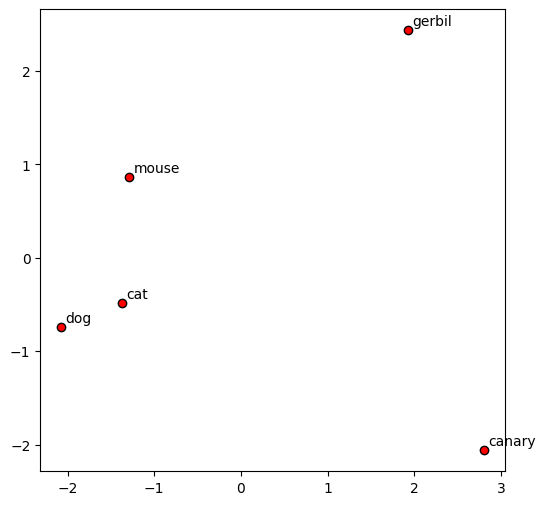

In [11]:
visualize_words(["dog", "cat", "mouse", "gerbil", "canary"], space)

For *three* of the words you inspected in 2.1, make visualizions that include the word and its 10 nearest neighbors as determined in 2.1. 

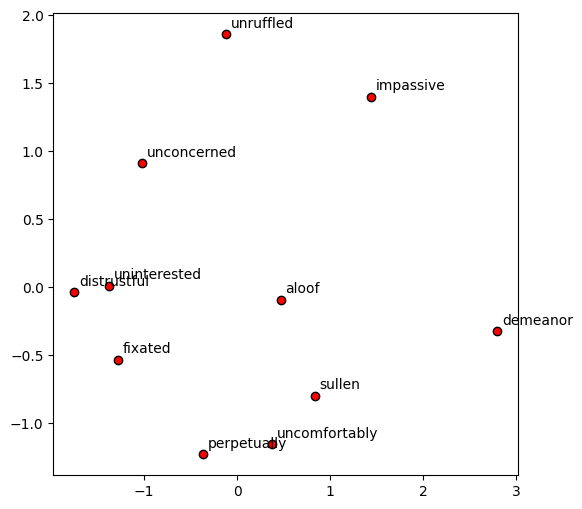

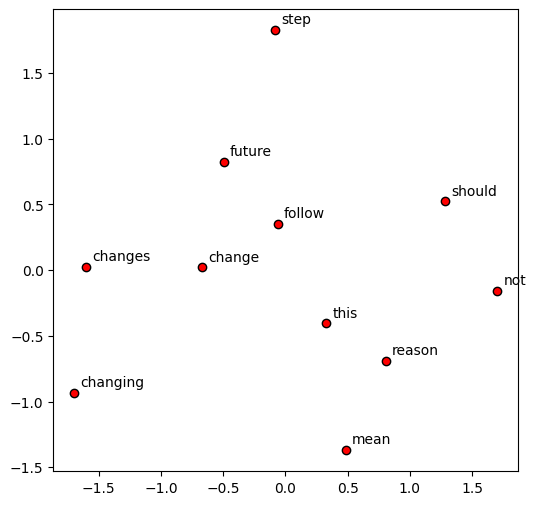

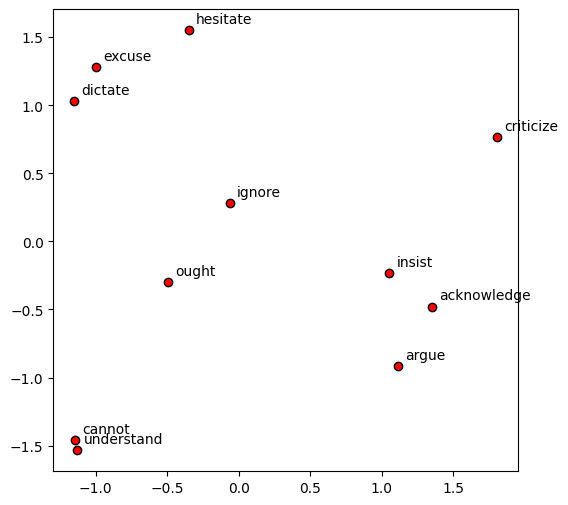

In [12]:
# space for your code here. 

# create a list for each word
# the first word in the list is the original word
# the rest are it's ten most similar words

aloof_list = ["aloof",]

change_list = ["change",]

ignore_list = ["ignore",]

# loop through the dictionary made for 2.1

for key, value in three_dict.items():
    for val in value:
        for i in range(10):

            # append each similar word to it's respective list

            if val == "aloof":
                aloof_list.append(three_dict[key][val][i][0])
            elif val == "change": 
                change_list.append(three_dict[key][val][i][0])
            elif val == "ignore":
                ignore_list.append(three_dict[key][val][i][0])

# create a scatter plot for each of them

aloof_visual = visualize_words(aloof_list, space)

change_visual = visualize_words(change_list, space)

ignore_visual = visualize_words(ignore_list, space)

Please write down at least two observations about the visualizations you obtained:

*space for your text answer here*

Aloof is the most aloof word of the bunch.

## 2.3 Computing cosine similarity (15 points)

The cosine similarity of two vectors $\vec a = \langle a_1, \ldots, a_n\rangle$ and $\vec b = \langle b_1, \ldots, b_n\rangle$ is defined as 

$cos(\vec a, \vec b) = \frac{
\sum_i a_i b_i}{\sqrt{\sum_i a_i^2} \sqrt{\sum_i b_i^2}}$

That is, for the numerator we get: $a_1b_1 + a_2b_2 + \ldots + a_nb_n$. 
In the denominator, we get this for $\vec a$: $\sqrt{a_1a_1 + a_2a_2 + \ldots + a_na_n}$, and anlogously for $\vec b$. 

Please compute the cosine similarity by hand for the following two vectors, and show your work: 

* $\langle 5, 12, 2\rangle$
* $\langle 7, 2, 9\rangle$

*space for your text answer here*

### Cosine Function
- $cos(\vec a, \vec b) = \frac{
\sum_i a_i b_i}{\sqrt{\sum_i a_i^2} \sqrt{\sum_i b_i^2}}$

### Vectors

- $\vec a = \langle 5, 12, 2\rangle$

- $\vec b = \langle 7, 2, 9\rangle$

### Use the Cosine Function on the vectors

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{(5 \cdot 7) + (12 \cdot 2) + (2 \cdot 9)}{\sqrt{5^2 + 12^2 + 2^2} \cdot {\sqrt{7^2 + 2^2 + 9^2}}}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{(35) + (24) + (18)}{\sqrt{5^2 + 12^2 + 2^2} \cdot {\sqrt{7^2 + 2^2 + 9^2}}}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{77}{\sqrt{ 5^2 + 12^2 + 2^2} \cdot {\sqrt{7^2 + 2^2 + 9^2}}}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{77}{\sqrt{25 + 144 + 4} \cdot {\sqrt{49 + 4 + 81}}}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{77}{\sqrt{173} \cdot {\sqrt{134}}}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = \frac{77}{152.2563}$

- $cos(\langle 5, 12, 2\rangle, \langle 7, 2, 9\rangle ) = 0.50573$

Now write Python code that will compute cosine similarity, without using gensim's `similarity`. You will need to load the `math` package and use `math.sqrt()` for the square root. Apply your code to the two vectors from above.
 

In [13]:
# space for your code here
from math import sqrt

# a and b are the vectors

def homemade_cosine_similarity(a, b):

    #set variables for numerator and denominator

    numerator = 0

    a_denom = 0
    
    b_denom = 0

    # we only need 1 for loop for both the numerator and denominator
    # a and b should be the same size, so it's safe to just use the len of a

    for i in range(len(a)):
        
        new_numer = a[i] * b[i]
        
        numerator += new_numer

        a_denom += a[i]**2

        b_denom += b[i]**2

    # the denominator variable will calculate the final denominator

    denominator = sqrt(a_denom) * sqrt(b_denom)

    return (f"{numerator/denominator:.5}")

a = [5, 12, 2]
b = [7, 2, 9]

homemade_cosine_similarity(a, b)

'0.50573'